# Training von Pixel-Klassifikatoren aus Ordnern mit Bildern
Bei der Ausbildung von Pixel-Klassifikatoren ist es oft sinnvoll, mit mehreren Bildern zu trainieren. Wenn Bilder beispielsweise unterschiedlich aussehen, insbesondere zwischen verschiedenen Bedingungen, ist es notwendig, Klassifikatoren mit mehreren Bildern aus allen Bedingungen zu trainieren.

In diesem Notebook zeigen wir, wie man [APOC](https://github.com/haesleinhuepf/apoc)-Klassifikatoren mit zwei Ordnern trainiert, die Paare von Trainingsdaten enthalten.

In [1]:
import apoc
import os
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

## Datenvorbereitung
Wir beginnen mit der Auswahl von zwei Eingabeordnern. Einer mit Bildern und einer mit spärlich annotierten Etikettenbildern. Die Namen der Dateien in diesem Ordner müssen paarweise identisch sein. Wir werden auch einen kurzen Blick in diese Ordner werfen.

Zu Demonstrationszwecken verwenden wir Daten des [BBBC007-Datensatzes](https://bbbc.broadinstitute.org/BBBC007) Version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), verfügbar aus der Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

In [2]:
image_folder = "../../data/BBBC007/images/"
masks_folder = "../../data/BBBC007/masks/"

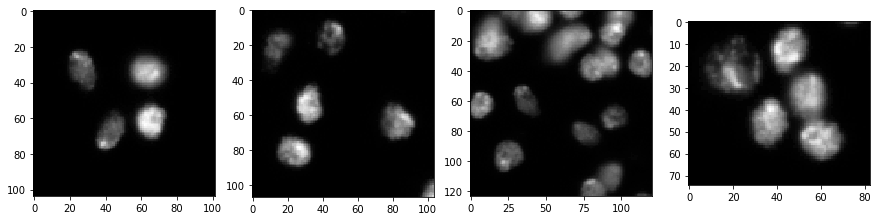

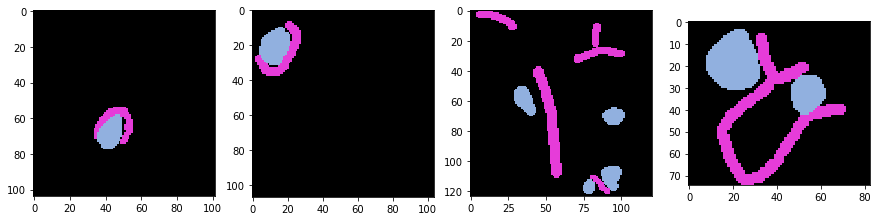

In [3]:
file_list = os.listdir(image_folder)

# show all images
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[i])
plt.show()
    
# show corresponding label images
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    masks = imread(masks_folder + filename)
    cle.imshow(masks, plot=axs[i], labels=True)
plt.show()


## Training
Wenn die Ordner ordnungsgemäß eingerichtet sind, können wir sie dem Training übergeben.

In [4]:
# setup classifer and where it should be saved
segmenter = apoc.ObjectSegmenter(opencl_filename="test2.cl")

# setup feature set used for training
features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = image_folder, 
    ground_truth = masks_folder)

## Vorhersage
Nach dem Training können wir den Klassifikator auf alle Bilder im Bildordner anwenden. Die folgende Zeile lädt den Klassifikator von der Festplatte neu. Auf diese Weise können wir sicherstellen, dass er korrekt gespeichert wurde.

In [5]:
segmenter = apoc.ObjectSegmenter(opencl_filename="test2.cl")

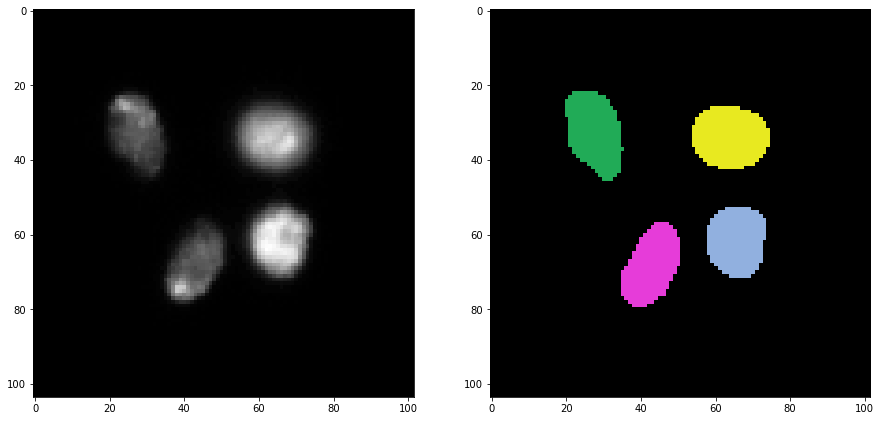

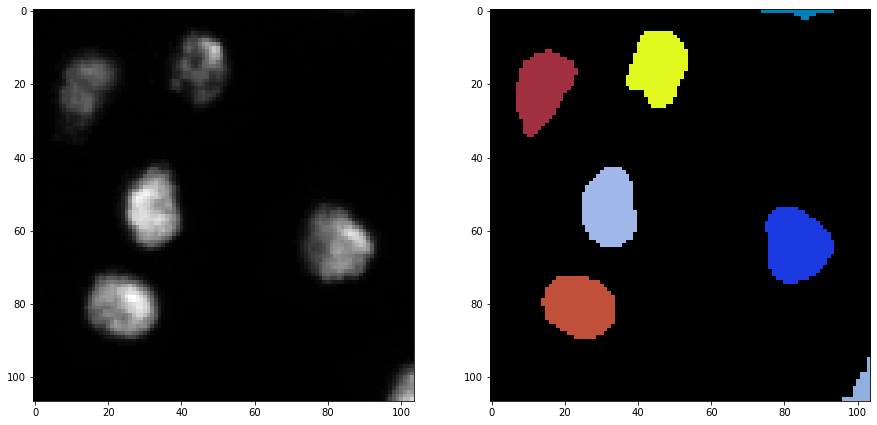

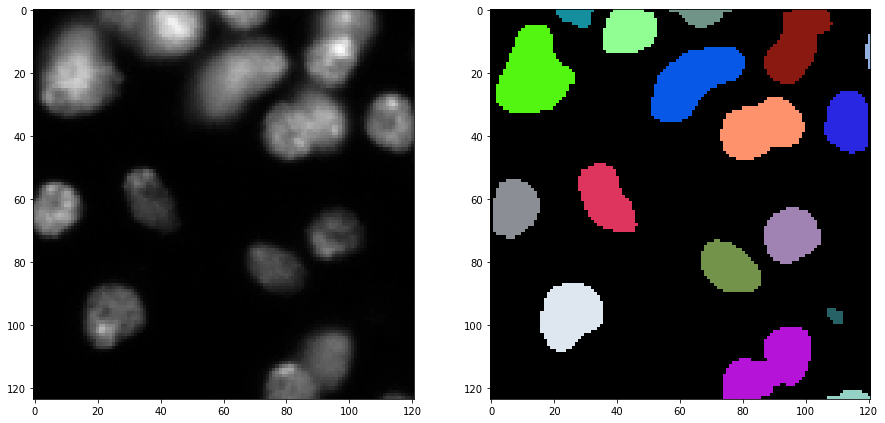

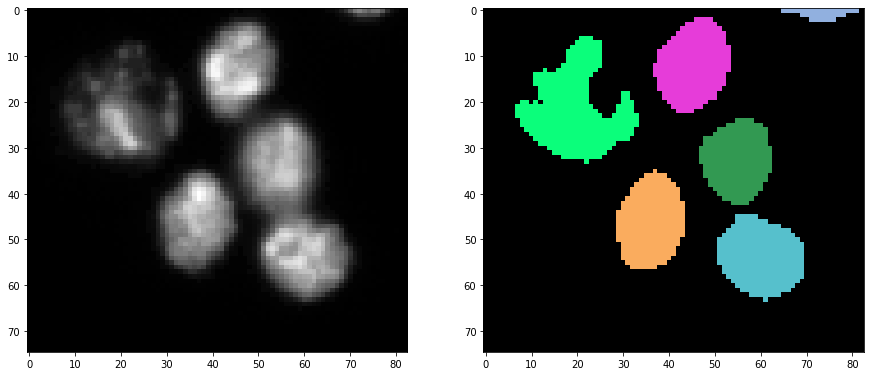

In [6]:
# show all images
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 2, figsize=(15,15))
    
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    plt.show()